In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("../data/raw-data.csv", sep=';')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
# Basic information about dataset
print("Shape:", df.shape)
print(df.info())

Shape: (4424, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification 

In [6]:
# Split features and target variable
target_col = "Target"
X = df.drop(columns=[target_col])
y = df[target_col]

In [7]:
# Converting Target Row to Numeric (for Heatmap)
df['Target_Numeric'] = df['Target'].str.strip().map({'Dropout': 0, 'Graduate': 1, 'Enrolled': 2})

c:\Python311\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


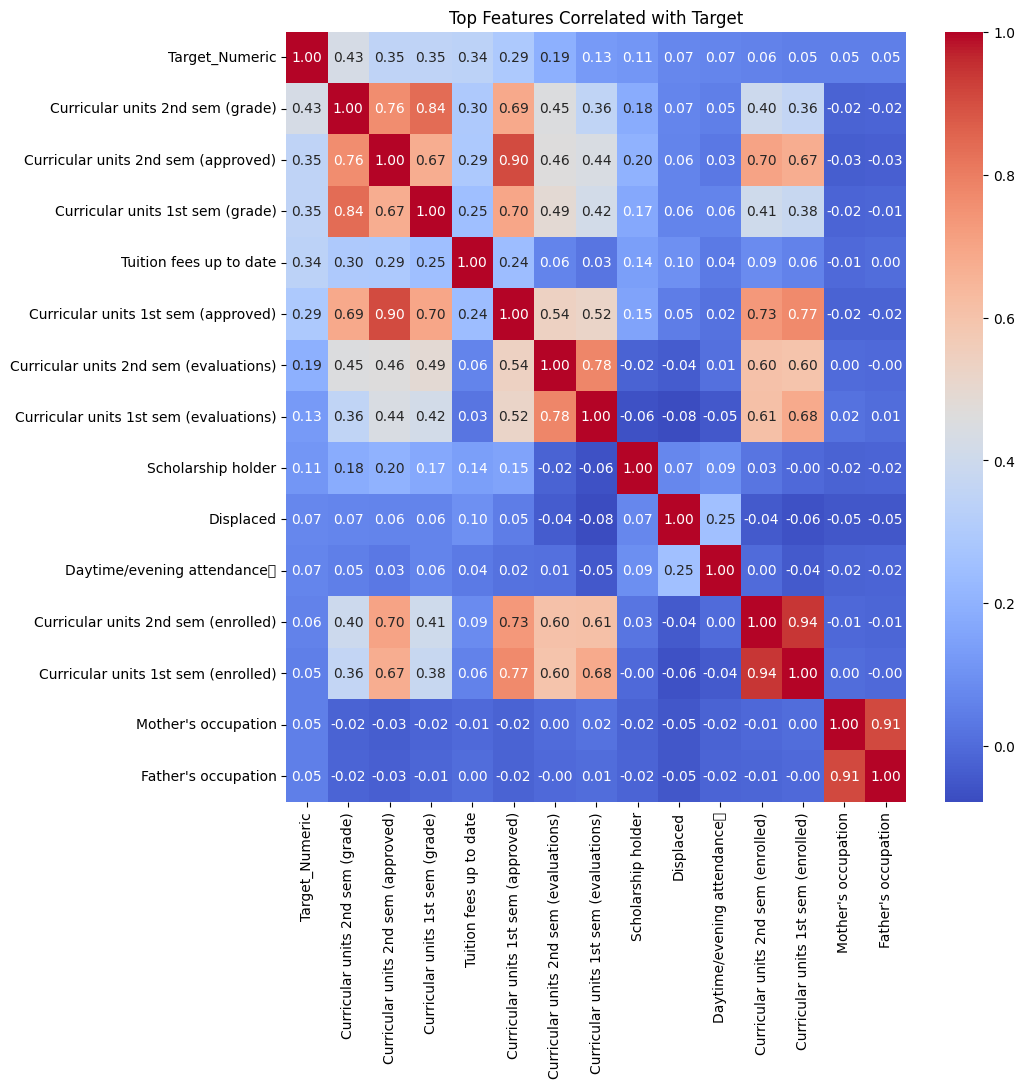

In [8]:
# Correlation Heatmap (only top 15 features)
plt.figure(figsize=(10, 10))
top_corr = df.corr(numeric_only=True)['Target_Numeric'].sort_values(ascending=False).head(15)
sns.heatmap(df[top_corr.index].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Top Features Correlated with Target')
plt.show()

In [ ]:
"""
IMPORTANT DOMAIN INSIGHT
        1-Academic performance
        2-Curricular units behavior
        3-Student background / socio-economic
        4-Enrollment & age factors
This dataset has 4 strong information groups: We will compress + enhance these groups.
"""

'\nIMPORTANT DOMAIN INSIGHT\n        1-Academic performance\n        2-Curricular units behavior\n        3-Student background / socio-economic\n        4-Enrollment & age factors\nThis dataset has 4 strong information groups: We will compress + enhance these groups.\n'

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


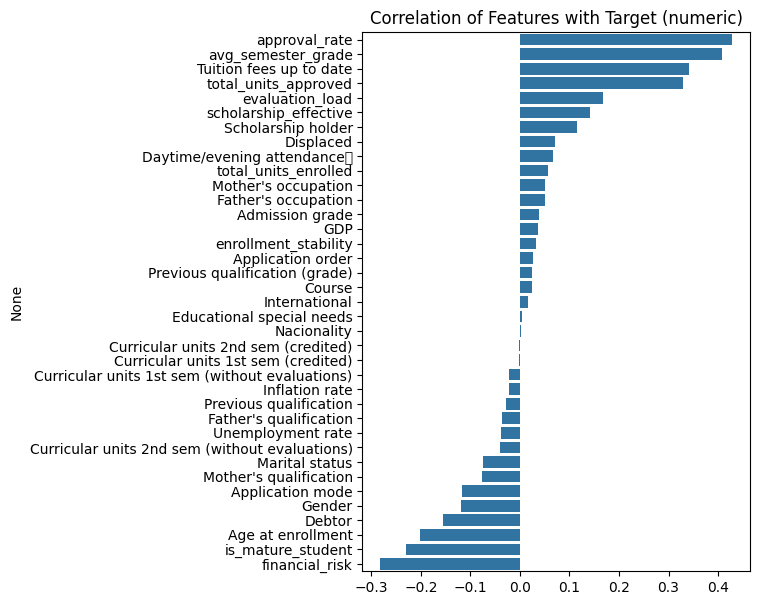

approval_rate                                     0.428737
avg_semester_grade                                0.407816
Tuition fees up to date                           0.342121
total_units_approved                              0.328267
evaluation_load                                   0.168438
scholarship_effective                             0.140611
Scholarship holder                                0.114517
Displaced                                         0.070649
Daytime/evening attendance\t                      0.066439
total_units_enrolled                              0.056901
Mother's occupation                               0.051664
Father's occupation                               0.051455
Admission grade                                   0.038716
GDP                                               0.037052
enrollment_stability                              0.033052
Application order                                 0.027393
Previous qualification (grade)                    0.0250

In [44]:
# correlations only among numeric columns and numeric target
corr = df.corr(numeric_only=True)['Target_Numeric'].sort_values(ascending=False)

# drop self-correlation entry
corr = corr.drop('Target_Numeric')

plt.figure(figsize=(5,7))
sns.barplot(x=corr.values, y=corr.index)
plt.title("Correlation of Features with Target (numeric)")
plt.show()

corr

In [19]:
# 1-Academic Performance Aggregation 
# Problem: Multiple semester-wise columns = noisy & redundant
# Solution: Create performance-level features

df["total_units_enrolled"] = (
    df["Curricular units 1st sem (enrolled)"] +
    df["Curricular units 2nd sem (enrolled)"]
)

df["total_units_approved"] = (
    df["Curricular units 1st sem (approved)"] +
    df["Curricular units 2nd sem (approved)"]
)
df["approval_rate"] = (
    df["total_units_approved"] / df["total_units_enrolled"]
).replace([np.inf, np.nan], 0)

df[["total_units_enrolled", "total_units_approved", "approval_rate"]].head()

,total_units_enrolled,total_units_approved,approval_rate
0,0,0,0.000000
1,12,12,1.000000
2,12,0,0.000000
3,12,11,0.916667
4,12,11,0.916667


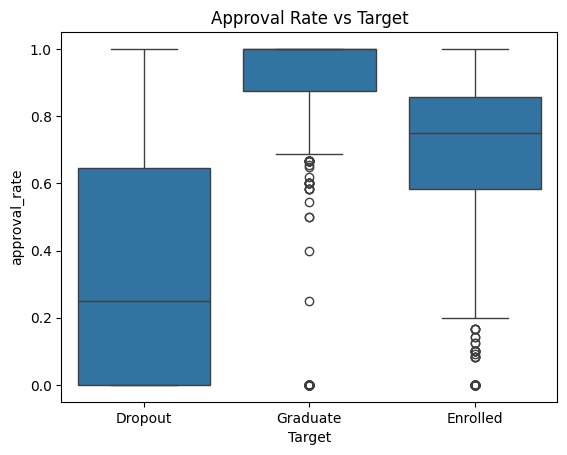

In [ ]:
# visualize the new feature 
sns.boxplot(data=df, x=target_col, y="approval_rate")
plt.title("Approval Rate vs Target")
plt.show()

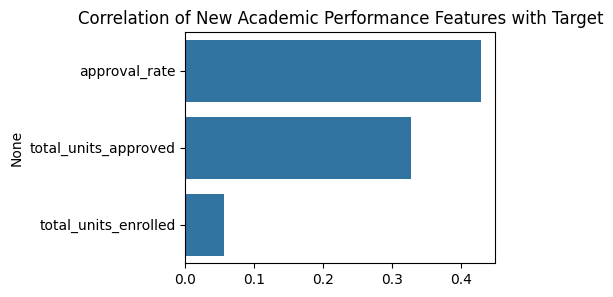

In [14]:
# visualize the new features correlation with target
new_features = ["total_units_enrolled", "total_units_approved", "approval_rate"]
new_corr = df[new_features + ['Target_Numeric']].corr(numeric_only=True)['Target_Numeric'].sort_values(ascending=False).drop('Target_Numeric')
plt.figure(figsize=(4,3))
sns.barplot(x=new_corr.values, y=new_corr.index)
plt.title("Correlation of New Academic Performance Features with Target")
plt.show()

In [20]:
# Grade-Based Feature Compression
df["avg_semester_grade"] = (
    df["Curricular units 1st sem (grade)"] +
    df["Curricular units 2nd sem (grade)"]
) / 2
df["avg_semester_grade"] = df["avg_semester_grade"].replace([np.inf, np.nan], 0)

df[["Curricular units 1st sem (grade)", "Curricular units 2nd sem (grade)", "avg_semester_grade"]].head()

,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),avg_semester_grade
0,0.000000,0.000000,0.000000
1,14.000000,13.666667,13.833333
2,0.000000,0.000000,0.000000
3,13.428571,12.400000,12.914286
4,12.333333,13.000000,12.666667


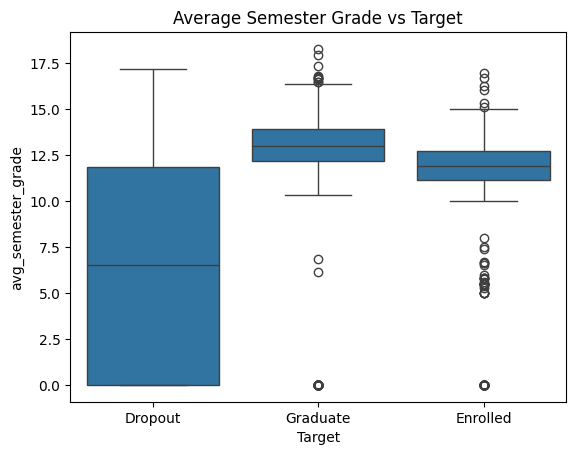

In [24]:
# visualize new feature
sns.boxplot(data=df, x=target_col, y="avg_semester_grade")
plt.title("Average Semester Grade vs Target")
plt.show()

In [25]:
# Academic Engagement Indicator
df["evaluation_load"] = (
    df["Curricular units 1st sem (evaluations)"] +
    df["Curricular units 2nd sem (evaluations)"]
)
df["evaluation_load"] = df["evaluation_load"].replace([np.inf, np.nan], 0)

df[["Curricular units 1st sem (evaluations)", "Curricular units 2nd sem (evaluations)", "evaluation_load"]].head()

,Curricular units 1st sem (evaluations),Curricular units 2nd sem (evaluations),evaluation_load
0,0,0,0
1,6,6,12
2,0,0,0
3,8,10,18
4,9,6,15


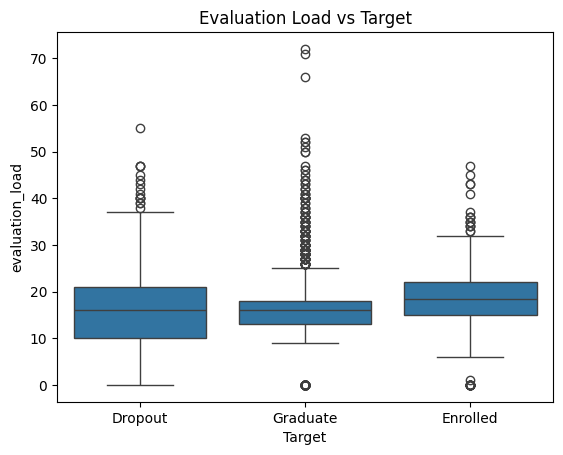

In [29]:
# visualize new feature
sns.boxplot(data=df, x=target_col, y="evaluation_load")
plt.title("Evaluation Load vs Target")
plt.show()

In [ ]:
# Age Risk Flag (NON-LINEAR INSIGHT)
# Older students statistically have higher dropout risk
df["is_mature_student"] = (df["Age at enrollment"] >= 25).astype(int)


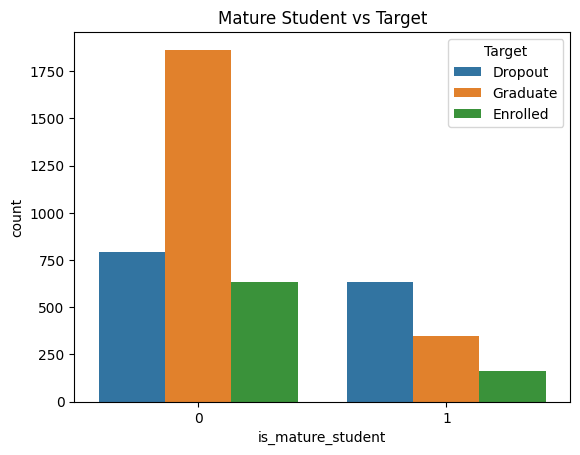

In [36]:
# Mature Student Flag
sns.countplot(data=df, x="is_mature_student", hue=target_col)
plt.title("Mature Student vs Target")
plt.show()

In [ ]:
# Financial Pressure Feature
df["financial_risk"] = (
    (df["Debtor"] == 1) | (df["Tuition fees up to date"] == 0)
).astype(int)


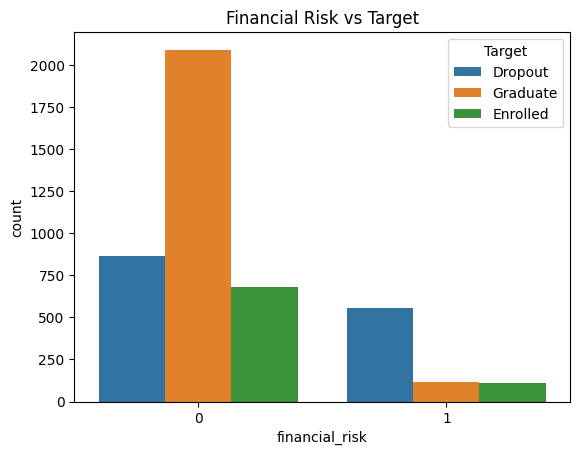

In [38]:
# visualize the new feature
sns.countplot(data=df, x="financial_risk", hue=target_col)
plt.title("Financial Risk vs Target")
plt.show()

In [39]:
# Scholarship Effectiveness Feature
df["scholarship_effective"] = (
    (df["Scholarship holder"] == 1) &
    (df["approval_rate"] > 0.6)
).astype(int)

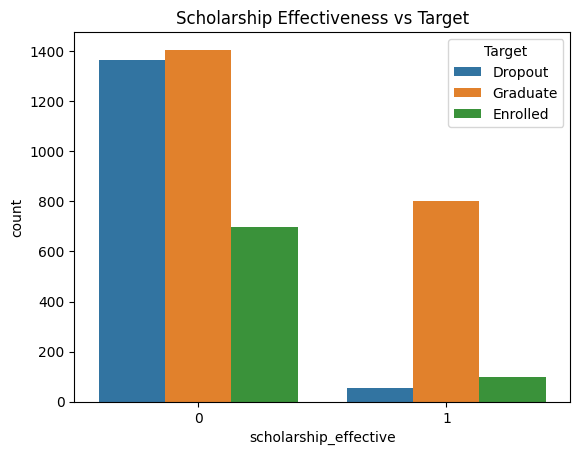

In [40]:
# visualize new feature
sns.countplot(data=df, x="scholarship_effective", hue=target_col)
plt.title("Scholarship Effectiveness vs Target")
plt.show()

In [41]:
# Enrollment Stability Feature
df["enrollment_stability"] = (
    df["total_units_enrolled"] / df["evaluation_load"]
).replace([np.inf, np.nan], 0)

In [57]:
# Drop Redundant Extra Columns
# Now that info is merged, raw columns are less useful
cols_to_drop = [
    "Curricular units 1st sem (enrolled)",
    "Curricular units 2nd sem (enrolled)",
    "Curricular units 1st sem (approved)",
    "Curricular units 2nd sem (approved)",
    "Curricular units 1st sem (grade)",
    "Curricular units 2nd sem (grade)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 2nd sem (evaluations)",
    'Nacionality', 
    'International', 
    'Educational special needs', 
    'Course', 
    'Application mode', 
    'Application order'
]

df.drop(columns=cols_to_drop, inplace=True, errors='ignore')
df.head(5)

,Marital status,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,...,Target_Numeric,total_units_enrolled,total_units_approved,approval_rate,avg_semester_grade,evaluation_load,is_mature_student,financial_risk,scholarship_effective,enrollment_stability
0,1,1,1,122.0,19,12,5,9,127.3,1,...,0,0,0,0.000000,0.000000,0,0,0,0,0.000000
1,1,1,1,160.0,1,3,3,3,142.5,1,...,1,12,12,1.000000,13.833333,12,0,1,0,1.000000
2,1,1,1,122.0,37,37,9,9,124.8,1,...,0,12,0,0.000000,0.000000,0,0,1,0,0.000000
3,1,1,1,122.0,38,37,5,3,119.6,1,...,1,12,11,0.916667,12.914286,18,0,0,0,0.666667
4,2,0,1,100.0,37,38,9,9,141.5,0,...,1,12,11,0.916667,12.666667,15,1,0,0,0.800000


c:\Python311\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


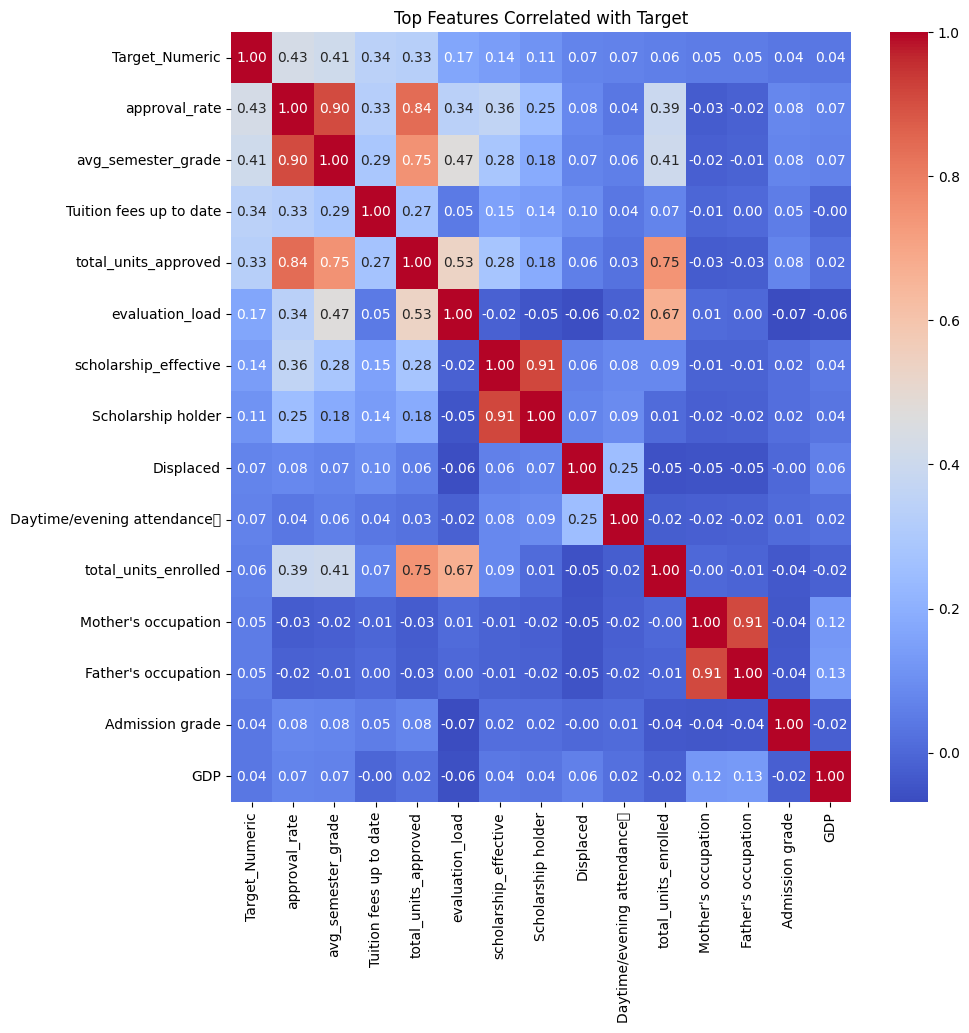

In [60]:
# Correlation Heatmap (only top 15 features)
plt.figure(figsize=(10, 10))
top_corr = df.corr(numeric_only=True)['Target_Numeric'].sort_values(ascending=False).head(15)
sns.heatmap(df[top_corr.index].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Top Features Correlated with Target')
plt.show()

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


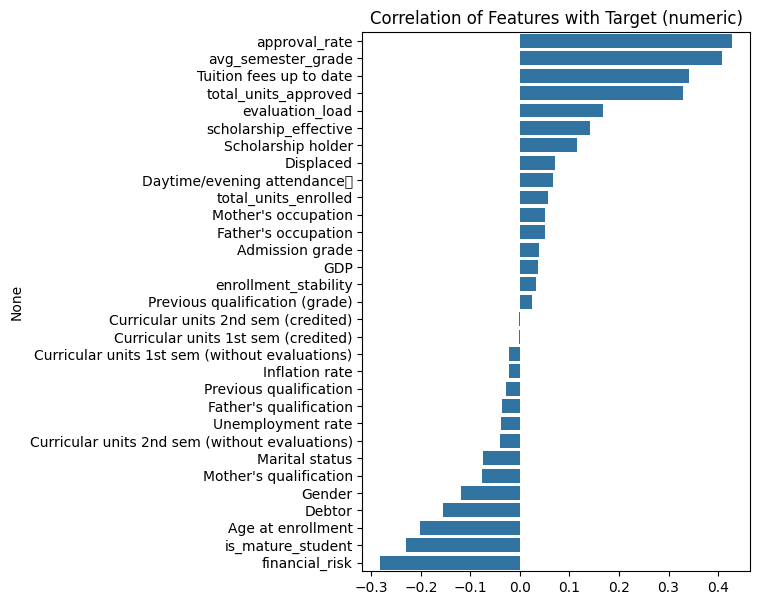

approval_rate                                     0.428737
avg_semester_grade                                0.407816
Tuition fees up to date                           0.342121
total_units_approved                              0.328267
evaluation_load                                   0.168438
scholarship_effective                             0.140611
Scholarship holder                                0.114517
Displaced                                         0.070649
Daytime/evening attendance\t                      0.066439
total_units_enrolled                              0.056901
Mother's occupation                               0.051664
Father's occupation                               0.051455
Admission grade                                   0.038716
GDP                                               0.037052
enrollment_stability                              0.033052
Previous qualification (grade)                    0.025096
Curricular units 2nd sem (credited)              -0.0024

In [61]:
# correlations only among numeric columns and numeric target
corr = df.corr(numeric_only=True)['Target_Numeric'].sort_values(ascending=False)

# drop self-correlation entry
corr = corr.drop('Target_Numeric')

plt.figure(figsize=(5,7))
sns.barplot(x=corr.values, y=corr.index)
plt.title("Correlation of Features with Target (numeric)")
plt.show()

corr

In [62]:
# Final dataset shape
print("Final shape:", df.shape)
df.head()

Final shape: (4424, 33)


,Marital status,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,...,Target_Numeric,total_units_enrolled,total_units_approved,approval_rate,avg_semester_grade,evaluation_load,is_mature_student,financial_risk,scholarship_effective,enrollment_stability
0,1,1,1,122.0,19,12,5,9,127.3,1,...,0,0,0,0.000000,0.000000,0,0,0,0,0.000000
1,1,1,1,160.0,1,3,3,3,142.5,1,...,1,12,12,1.000000,13.833333,12,0,1,0,1.000000
2,1,1,1,122.0,37,37,9,9,124.8,1,...,0,12,0,0.000000,0.000000,0,0,1,0,0.000000
3,1,1,1,122.0,38,37,5,3,119.6,1,...,1,12,11,0.916667,12.914286,18,0,0,0,0.666667
4,2,0,1,100.0,37,38,9,9,141.5,0,...,1,12,11,0.916667,12.666667,15,1,0,0,0.800000


In [63]:
# saving engineered dataset
OUTPUT_PATH = "../data/featured-data.csv"
df.to_csv(OUTPUT_PATH, index=False)

print("Feature engineered data saved at:", OUTPUT_PATH)


Feature engineered data saved at: ../data/featured-data.csv
